In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes-limpio.csv", low_memory=False)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,dias de retraso,weekday
0,1291006,Debt collection,Unknown or not specified,Communication tactics,Frequent or repeated calls,TX,76119,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,Unknown or not specified,0 days,Thursday
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,2127,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes,0 days,Thursday
3,1291615,Credit card,Unknown or not specified,Other,Unknown or not specified,CA,92592,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,Unknown or not specified,0 days,Thursday
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,OH,43068,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,Unknown or not specified,0 days,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201,2015-01-01,2015-01-01,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,0 days,Thursday
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,Unknown or not specified,GA,30043,2015-01-01,2015-01-01,DriveTime,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,55105,2015-01-01,2015-01-01,Regions,Closed with non-monetary relief,Yes,No,0 days,Thursday
28154,1178181,Payday loan,Unknown or not specified,Can't stop charges to bank account,Unknown or not specified,CA,92509,2015-01-01,2015-01-01,Moneytree Inc,Closed with explanation,Yes,Unknown or not specified,0 days,Thursday


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [3]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [4]:
df=df.drop(columns=["Company", "Date received",	"Date sent to company", "dias de retraso" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [5]:
df.drop(columns=["Complaint ID", "ZIP code"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,Company response,Timely response?,Consumer disputed?,weekday
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,MA,Closed with explanation,Yes,Yes,Thursday
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,OH,Closed with explanation,Yes,Yes,Wednesday
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,Closed with explanation,Yes,Yes,Wednesday
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,Closed with non-monetary relief,Yes,Yes,Wednesday
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,IL,Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,MI,Closed with explanation,Yes,No,Thursday
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,AR,Closed with monetary relief,Yes,No,Thursday
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,TX,Closed with non-monetary relief,Yes,No,Thursday
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,MN,Closed with non-monetary relief,Yes,No,Thursday


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   Company response    6006 non-null   object
 6   Timely response?    6006 non-null   object
 7   Consumer disputed?  6006 non-null   object
 8   weekday             6006 non-null   object
dtypes: object(9)
memory usage: 469.2+ KB


In [7]:
X=df.drop(columns=["Consumer disputed?"])

In [8]:
y=df["Consumer disputed?"]

In [9]:
import optuna
from optuna import Trial

from optuna.distributions import IntDistribution, CategoricalDistribution, FloatDistribution

"""param_distributions = {
    "randomforestclassifier__n_estimators": IntDistribution(50, 500),
    "randomforestclassifier__max_depth": IntDistribution(2, 30),
    "randomforestclassifier__min_samples_split": IntDistribution(2, 20),
    "randomforestclassifier__min_samples_leaf": IntDistribution(1, 20),
    "randomforestclassifier__max_features": CategoricalDistribution(["sqrt", "log2", None]),
    "randomforestclassifier__bootstrap": CategoricalDistribution([True, False]),
    "randomforestclassifier__class_weight": CategoricalDistribution(['balanced', 'balanced_subsample', None ]),

}"""

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'param_distributions = {\n    "randomforestclassifier__n_estimators": IntDistribution(50, 500),\n    "randomforestclassifier__max_depth": IntDistribution(2, 30),\n    "randomforestclassifier__min_samples_split": IntDistribution(2, 20),\n    "randomforestclassifier__min_samples_leaf": IntDistribution(1, 20),\n    "randomforestclassifier__max_features": CategoricalDistribution(["sqrt", "log2", None]),\n    "randomforestclassifier__bootstrap": CategoricalDistribution([True, False]),\n    "randomforestclassifier__class_weight": CategoricalDistribution([\'balanced\', \'balanced_subsample\', None ]),\n\n}'

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder 
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

# Identify feature types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()




# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing with type conversion fix


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # opcional
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
model=SVC(random_state=42, probability=True)

# Complete pipeline with ADASYN
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', ADASYN(random_state=42)),
    ('randomforestclassifier', model)
])

# Train the pipeline

In [11]:
trained_preprocessor = model_pipeline.named_steps['preprocessor']


In [12]:
trained_preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Product', 'Sub-product', 'Issue',
                                  'Sub-issue', 'State', 'Company response',
                                  'Timely response?', 'weekday'])])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=True, shuffle=True)

In [14]:
from sklearn.model_selection import StratifiedKFold
from optuna.integration import OptunaSearchCV

"""optuna_search = OptunaSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_trials=150,  # Number of trials/studies
    timeout=None,  # Or set a time limit (in seconds)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

optuna_search.fit(X_train, y_train)"""

"optuna_search = OptunaSearchCV(\n    estimator=model_pipeline,\n    param_distributions=param_distributions,\n    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),\n    scoring='f1_macro',\n    n_trials=150,  # Number of trials/studies\n    timeout=None,  # Or set a time limit (in seconds)\n    n_jobs=-1,\n    verbose=2,\n    random_state=42\n)\n\noptuna_search.fit(X_train, y_train)"

In [15]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Product', 'Sub-product',
                                                   'Issue', 'Sub-issue',
                                                   'State', 'Company response',
                                                   'Timely response?',
                                                   'weekday'])])),
                ('oversampler', ADASYN(random_state=42)),
                ('randomforestclassifier',
                 SVC(probability=True, random_state=42))])

In [16]:
"""model_pipeline.set_params(**optuna_search.best_params_)"""
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Product', 'Sub-product',
                                                   'Issue', 'Sub-issue',
                                                   'State', 'Company response',
                                                   'Timely response?',
                                                   'weekday'])])),
                ('oversampler', ADASYN(random_state=42)),
                ('randomforestclassifier',
                 SVC(probability=True, random_state=42))])

In [17]:
y_probs = pd.DataFrame(model_pipeline.predict_proba(X_test)[:, 1])
y_probs

,0
0,0.665029
1,0.455892
2,0.440790
3,0.450546
4,0.430530
...,...
1197,0.492870
1198,0.383742
1199,0.465823
1200,0.595426


In [18]:
y_pred = (y_probs[0] > 0.5).astype(int)
y_pred


0       1
1       0
2       0
3       0
4       0
       ..
1197    0
1198    0
1199    0
1200    1
1201    1
Name: 0, Length: 1202, dtype: int64

In [19]:
y_pred.value_counts()

0
1    644
0    558
Name: count, dtype: int64

In [20]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


C:\Users\unaif\AppData\Local\Temp\ipykernel_6220\2068250395.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


Accuracy: 0.5574043261231281
Accuracy: 0.6645649432534678
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.55      0.35       260
           1       0.82      0.56      0.66       942

    accuracy                           0.56      1202
   macro avg       0.54      0.55      0.51      1202
weighted avg       0.70      0.56      0.60      1202

Confusion Matrix:


<Axes: >

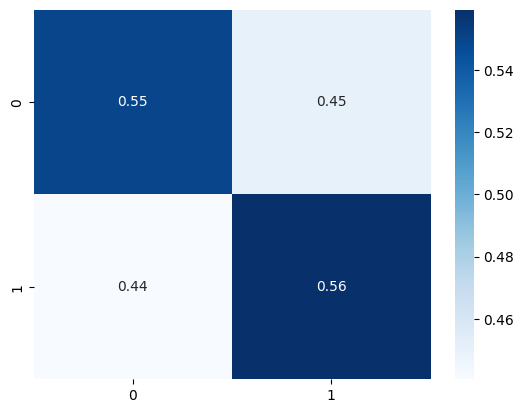

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
F1 = f1_score(y_test, y_pred)
print(f"Accuracy: {F1}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
(heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1]))


In [22]:
import numpy as np
thresholds = np.arange(.01, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = accuracy_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

# print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor F1 obtenido: 0.7845257903494176


In [23]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(model_pipeline, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.5449670824670825
0.025157422257760235


In [24]:
import os 
import pickle
os.chdir("../models")

"""with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)"""

"with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:\n    pickle.dump(model_pipeline, f)"

In [25]:
import dill
with open("modelo_pipe_dispute_SVC_onehot_.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

In [26]:
trained_preprocessor.transform(X)

array([[ 6.,  9.,  7., ...,  1.,  1.,  4.],
       [ 1., 16., 52., ...,  1.,  1.,  6.],
       [ 4., 26., 72., ...,  1.,  1.,  6.],
       ...,
       [ 4., 32., 24., ...,  3.,  1.,  4.],
       [ 6.,  6., 49., ...,  3.,  1.,  4.],
       [ 5.,  8., 58., ...,  1.,  1.,  4.]])

In [27]:
dense_array = trained_preprocessor.transform(X).toarray()  # convert sparse to dense

# Create DataFrame
df = pd.DataFrame(trained_preprocessor.transform(X))

print(df.shape)
print(df.head())

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
import pandas as pd

df_sparse = pd.DataFrame.sparse.from_spmatrix(trained_preprocessor.transform(X))
print(df_sparse.shape)
print(df_sparse.head())


(6006, 1215)
   0     1     2     3     4     5     6     7     8     9     ...  1205  \
0     0     0     0     0     0     0   1.0     0     0     0  ...     0   
1     0   1.0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0   1.0     0     0     0     0     0  ...     0   
3     0     0     0     0   1.0     0     0     0     0     0  ...     0   
4     0     0     0     0   1.0     0     0     0     0     0  ...     0   

   1206  1207  1208  1209  1210  1211  1212  1213  1214  
0     0     0     0     0   1.0     0     0     0   1.0  
1     0     0     0     0   1.0     0     0     0   1.0  
2     0     0     0     0   1.0     0     0     0   1.0  
3     0     0     0     0     0     0   1.0     0   1.0  
4     0     0     0     0   1.0     0     0     0   1.0  

[5 rows x 1215 columns]


In [ ]:
df_sparse


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
1,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
2,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
3,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,1.0
4,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,1.0
6002,0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,0,0,1.0
6003,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,1.0
6004,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,1.0
